# Manifold mixup

This is a short demo of [manifold mixup](http://proceedings.mlr.press/v97/verma19a/verma19a.pdf) inspired by fast.ai's [input mixup demo](https://docs.fast.ai/callbacks.mixup.html).

In [1]:
from fastai.vision import *
from manifold_mixup import *

Get the dataset:

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

## No mixup

epoch,train_loss,valid_loss,accuracy,time
0,0.131737,0.100636,0.970069,00:01
1,0.091286,0.067192,0.975957,00:01
2,0.062798,0.065192,0.976448,00:01
3,0.046274,0.056362,0.979392,00:01
4,0.041630,0.069838,0.975466,00:01
5,0.041447,0.050700,0.983317,00:01
6,0.032113,0.033936,0.987242,00:01
7,0.032956,0.033558,0.987242,00:01


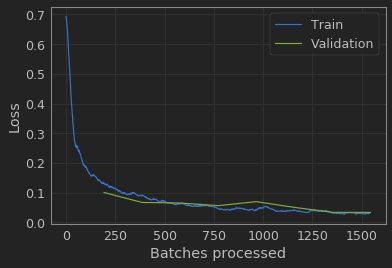

In [3]:
model = simple_cnn((3,16,16,2))
learn = Learner(data, model, metrics=[accuracy])
learn.fit(8)
learn.recorder.plot_losses()

## Input mixup

epoch,train_loss,valid_loss,accuracy,time
0,0.307541,0.140372,0.960746,00:01
1,0.264011,0.088521,0.976448,00:01
2,0.267568,0.085715,0.980864,00:01
3,0.256427,0.086134,0.981845,00:01
4,0.247336,0.064902,0.985280,00:01
5,0.245242,0.062691,0.985770,00:01
6,0.240998,0.064593,0.987242,00:01
7,0.237531,0.061494,0.985770,00:01


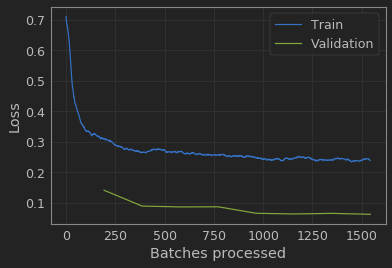

In [4]:
model = simple_cnn((3,16,16,2))
learn = Learner(data, model, metrics=[accuracy]).mixup()
learn.fit(8)
learn.recorder.plot_losses()

## Manifold mixup

Manifold mixup: no known network structure detected, 8 modules will be used for mixup.


epoch,train_loss,valid_loss,accuracy,time
0,0.293037,0.132363,0.967125,00:01
1,0.271213,0.107494,0.974485,00:01
2,0.264067,0.100730,0.977429,00:01
3,0.255964,0.083350,0.981845,00:01
4,0.245994,0.073371,0.983317,00:01
5,0.242816,0.079974,0.984298,00:01
6,0.239399,0.071537,0.984789,00:01
7,0.236019,0.068106,0.985280,00:01


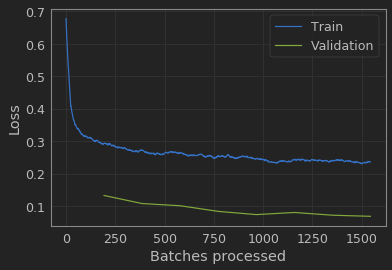

In [5]:
model = simple_cnn((3,16,16,2))
learn = Learner(data, model, metrics=[accuracy]).manifold_mixup()
learn.fit(8)
learn.recorder.plot_losses()

## Output mixup

epoch,train_loss,valid_loss,accuracy,time
0,0.288887,0.127210,0.967615,00:01
1,0.252481,0.080079,0.983317,00:01
2,0.244013,0.073728,0.985280,00:01
3,0.236769,0.061521,0.990677,00:01
4,0.229456,0.059553,0.989205,00:01
5,0.221601,0.055816,0.989696,00:01
6,0.224781,0.048368,0.991659,00:01
7,0.216859,0.043758,0.991659,00:01


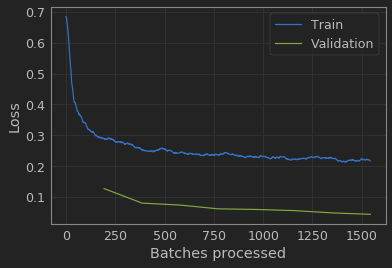

In [6]:
model = simple_cnn((3,16,16,2))
learn = Learner(data, model, metrics=[accuracy]).output_mixup()
learn.fit(8)
learn.recorder.plot_losses()